# Money Flow Index (MFI)

Money Flow Index (MFI) is a technical oscillator that uses price and volume for identifying overbought or oversold conditions in an asset. It can also be used to spot divergences which warn of a trend change in price. The oscillator moves between 0 and 100.

https://www.investopedia.com/terms/m/mfi.asp

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# fix_yahoo_finance is used to fetch data 
import fix_yahoo_finance as yf
yf.pdr_override()

In [2]:
# input
symbol = 'AAPL'
start = '2018-08-01'
end = '2019-01-01'

# Read data 
df = yf.download(symbol,start,end)

# View Columns
df.head()

[*********************100%***********************]  1 of 1 downloaded


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-08-01,199.130005,201.759995,197.309998,201.500000,199.243088,67935700
2018-08-02,200.580002,208.380005,200.350006,207.389999,205.067123,62404000
2018-08-03,207.029999,208.740005,205.479996,207.990005,205.660416,33447400
2018-08-06,208.000000,209.250000,207.070007,209.070007,206.728317,25425400
2018-08-07,209.320007,209.500000,206.759995,207.110001,204.790268,25587400


In [3]:
import talib as ta

In [4]:
df['MFI'] = ta.MFI(df['High'], df['Low'],df['Adj Close'], df['Volume'], timeperiod=14)

In [5]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume,MFI
Date,,,,,,,
2018-12-24,148.149994,151.550003,146.589996,146.830002,146.202972,37169200,22.837777
2018-12-26,148.300003,157.229996,146.720001,157.169998,156.498810,58582500,30.569679
2018-12-27,155.839996,156.770004,150.070007,156.149994,155.483154,53117100,37.665928
2018-12-28,157.500000,158.520004,154.550003,156.229996,155.562820,42291400,43.782846
2018-12-31,158.529999,159.360001,156.479996,157.740005,157.066376,35003500,50.947126


In [6]:
df['Positive'] = df['MFI'] > 0

Text(0.5,0,'Date')

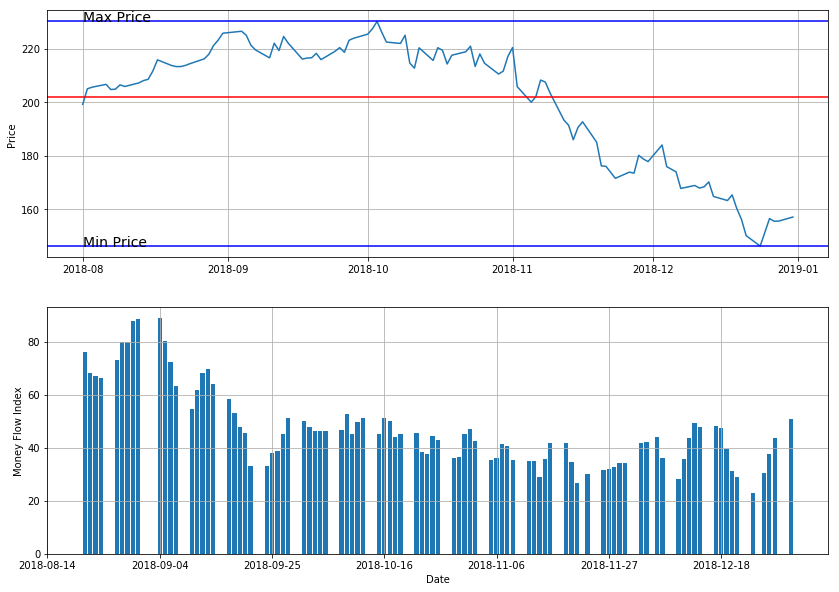

In [7]:
df['MFI'] = ta.MFI(df['High'], df['Low'],df['Adj Close'], df['Volume'], timeperiod=14)# Line Chart
fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
ax1.plot(df.index, df['Adj Close'])
ax1.axhline(y=df['Adj Close'].mean(),color='r')
ax1.axhline(y=df['Adj Close'].max(),color='b')
ax1.axhline(y=df['Adj Close'].min(),color='b')
ax1.text(s='Max Price', x=df['Adj Close'].index[0], y=df['Adj Close'].max(), fontsize=14)
ax1.text(s='Min Price', x=df['Adj Close'].index[0], y=df['Adj Close'].min(), fontsize=14)
ax1.set_ylabel('Price')
ax1.grid()

ax2 = plt.subplot(2, 1, 2)
# ax2.bar(df.index, df['MFI'], color=df.Positive.map({True: 'g', False: 'r'}))
ax2.bar(df.index, df['MFI'])
ax2.grid()
ax2.set_ylabel('Money Flow Index')
ax2.set_xlabel('Date')

## Candlestick with MFI

In [8]:
from matplotlib import dates as mdates
import datetime as dt

dfc = df.copy()
dfc['MFI'] = ta.MFI(dfc['High'], dfc['Low'],dfc['Adj Close'], dfc['Volume'], timeperiod=14)
dfc['VolumePositive'] = dfc['Open'] < dfc['Adj Close']
dfc = dfc.dropna()
dfc = dfc.reset_index()
dfc['Date'] = mdates.date2num(dfc['Date'].astype(dt.date))
dfc.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Positive,VolumePositive
0,736927.0,216.800003,217.190002,214.029999,215.039993,213.377167,26159800,76.119850,True,False
1,736928.0,214.100006,216.360001,213.839996,215.050003,213.387085,19018100,68.208761,True,False
2,736929.0,214.649994,217.050003,214.600006,215.490005,213.823685,18883200,67.000609,True,False
3,736930.0,216.600006,216.899994,215.110001,216.160004,214.488495,18476400,66.418692,True,False
4,736933.0,217.149994,218.740005,216.330002,217.940002,216.254745,20525100,73.306063,True,False


Text(0.5,0,'Date')

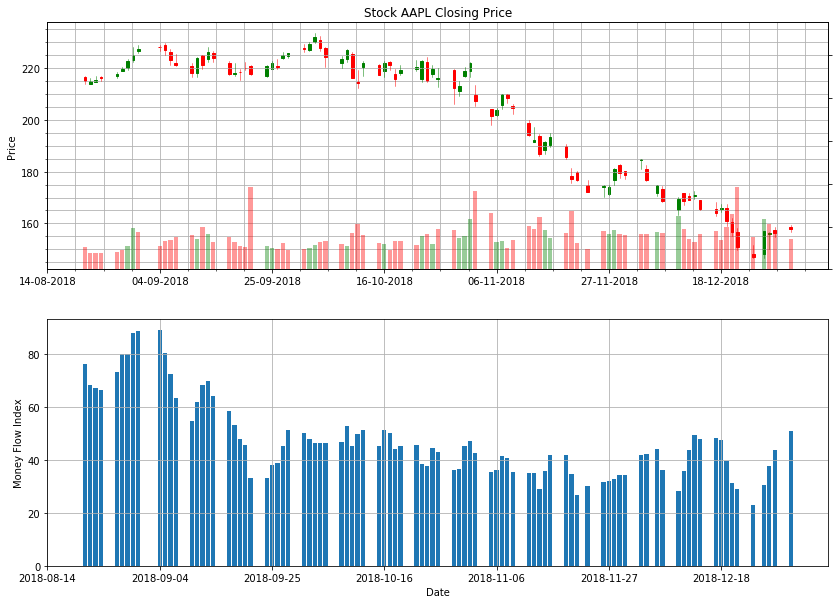

In [9]:
from mpl_finance import candlestick_ohlc

fig = plt.figure(figsize=(14,10))
ax1 = plt.subplot(2, 1, 1)
candlestick_ohlc(ax1,dfc.values, width=0.5, colorup='g', colordown='r', alpha=1.0)
ax1.xaxis_date()
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
ax1.grid(True, which='both')
ax1.minorticks_on()
ax1v = ax1.twinx()
colors = dfc.VolumePositive.map({True: 'g', False: 'r'})
ax1v.bar(dfc.Date, dfc['Volume'], color=colors, alpha=0.4)
ax1v.axes.yaxis.set_ticklabels([])
ax1v.set_ylim(0, 3*df.Volume.max())
ax1.set_title('Stock '+ symbol +' Closing Price')
ax1.set_ylabel('Price')

ax2 = plt.subplot(2, 1, 2)
ax2.bar(df.index, df['MFI'])
ax2.grid()
ax2.set_ylabel('Money Flow Index')
ax2.set_xlabel('Date')